In [1]:
import pandas as pd
import os
import numpy

OF_dir_path = 'C:/Users/Nischal/Desktop/BioVid_data_processing/Graph/OF/'
timestamp_dir_path = 'C:/Users/Nischal/Desktop/BioVid_data_processing/Graph/TimeStamp/'
Out_Path = 'C:/Users/Nischal/Desktop/BioVid_data_processing/Graph/Output/'
OF_files = os.listdir(OF_dir_path)

for f in OF_files:
    if f == '.DS_Store':
        OF_files.remove(f)

for i in range(0, len(OF_files)):

    with open(OF_dir_path + OF_files[i], 'r'):

        with open(timestamp_dir_path + OF_files[i], 'r'):

            key_csv = timestamp_dir_path + OF_files[i]
            search_csv = OF_dir_path + OF_files[i]

            print('PROCESSING ', OF_files[i], ' ....')
            df_key_csv = pd.read_csv(key_csv)
            df_search_csv = pd.read_csv(search_csv)

            Key_csv_timestamps = df_key_csv['time']
            Key_csv_Labels = df_key_csv['human_label']

            Search_csv_timestamps = df_search_csv['timestamp']

            # Initialize new CSV file with Columns:
            Final_DF = pd.DataFrame()
            Final_DF['frames'] = df_search_csv['frame']
            Final_DF['timestamp'] = df_search_csv['timestamp']
            
            Final_DF['AU_01r'] =  df_search_csv['AU01_r']
            Final_DF['AU_02r'] =  df_search_csv['AU02_r']
            Final_DF['AU_04r'] =  df_search_csv['AU04_r']
            Final_DF['AU_05r'] =  df_search_csv['AU05_r']
            Final_DF['AU_06r'] =  df_search_csv['AU06_r']
            Final_DF['AU_07r'] =  df_search_csv['AU07_r']
            Final_DF['AU_09r'] =  df_search_csv['AU09_r']
            Final_DF['AU_10r'] =  df_search_csv['AU10_r']
            Final_DF['AU_12r'] =  df_search_csv['AU12_r']
            Final_DF['AU_14r'] =  df_search_csv['AU14_r']
            Final_DF['AU_15r'] =  df_search_csv['AU15_r']
            Final_DF['AU_17r'] =  df_search_csv['AU17_r']
            Final_DF['AU_20r'] =  df_search_csv['AU20_r']
            Final_DF['AU_23r'] =  df_search_csv['AU23_r']
            Final_DF['AU_25r'] =  df_search_csv['AU25_r']
            Final_DF['AU_26r'] =  df_search_csv['AU26_r']
            Final_DF['AU_45r'] =  df_search_csv['AU45_r']
    
            Final_DF['AU_01c'] = df_search_csv['AU01_c']
            Final_DF['AU_02c'] = df_search_csv['AU02_c']
            Final_DF['AU_04c'] = df_search_csv['AU04_c']
            Final_DF['AU_05c'] = df_search_csv['AU05_c']
            Final_DF['AU_06c'] = df_search_csv['AU06_c']
            Final_DF['AU_07c'] = df_search_csv['AU07_c']
            Final_DF['AU_09c'] = df_search_csv['AU09_c']
            Final_DF['AU_10c'] = df_search_csv['AU10_c']
            Final_DF['AU_12c'] = df_search_csv['AU12_c']
            Final_DF['AU_14c'] = df_search_csv['AU14_c']
            Final_DF['AU_15c'] = df_search_csv['AU15_c']
            Final_DF['AU_17c'] = df_search_csv['AU17_c']
            Final_DF['AU_20c'] = df_search_csv['AU20_c']
            Final_DF['AU_23c'] = df_search_csv['AU23_c']
            Final_DF['AU_25c'] = df_search_csv['AU25_c']
            Final_DF['AU_26c'] = df_search_csv['AU26_c']
            Final_DF['AU_45c'] = df_search_csv['AU45_c']
            SUM_AU_r = df_search_csv['AU01_r'] + df_search_csv['AU02_r'] + df_search_csv['AU04_r'] \
                       + df_search_csv['AU05_r'] + df_search_csv['AU06_r'] + df_search_csv['AU07_r'] \
                       + df_search_csv['AU09_r'] + df_search_csv['AU10_r'] + df_search_csv['AU12_r'] \
                       + df_search_csv['AU14_r'] + df_search_csv['AU15_r'] + df_search_csv['AU17_r'] \
                       + df_search_csv['AU20_r'] + df_search_csv['AU23_r'] + df_search_csv['AU25_r'] \
                       + df_search_csv['AU26_r'] + df_search_csv['AU45_r']
            Final_DF['SUM_AU_r'] = SUM_AU_r
            
            row_count = df_search_csv.shape[0]
            PSPI = [0.0] * row_count
            indx = 0
            for index, row in df_search_csv.iterrows():
                PSPI[indx] = PSPI[indx] + row['AU04_r'] + max(row['AU06_r'],row['AU07_r']) + \
                     max(row['AU09_r'],row['AU10_r']) + row['AU45_r'] 
#                 + row['AU20_r'] + row['AU25_r']
                        # + max(row[' AU15_r'], row[' AU25_r']) + row[' AU45_r']
                indx = indx + 1
                

            Final_DF["PSPI_score"] = PSPI 
#             numpy.asarray(PSPI)/15.0
            #PSPI/15.0
            LABEL = [0] * df_search_csv['frame']
            count = 0

            for t in Key_csv_timestamps:
                actual_t = t
                integer_t = int(t)
                if actual_t in Search_csv_timestamps:
                    frame_no = int(25 * actual_t)
                    LABEL[frame_no:frame_no + 151] = Key_csv_Labels[count]
                elif integer_t in Search_csv_timestamps:
                    frame_no = 25 * integer_t + 10
                    LABEL[frame_no:frame_no + 151] = Key_csv_Labels[count]
                count = count + 1

            Final_DF['H_LABEL'] = LABEL
            Final_DF = Final_DF[Final_DF.H_LABEL != 0]
#             Final_DF = Final_DF[Final_DF.H_LABEL != 2]
#             Final_DF = Final_DF[Final_DF.H_LABEL != 3]
            Final_DF.to_csv(Out_Path + OF_files[i], index=False)

    print('File Done..')

PROCESSING  071709_w_23.csv  ....
File Done..
PROCESSING  071911_w_24.csv  ....
File Done..
PROCESSING  073114_m_25.csv  ....
File Done..
PROCESSING  080309_m_29.csv  ....
File Done..
PROCESSING  080714_m_23.csv  ....
File Done..
PROCESSING  081014_w_27.csv  ....
File Done..
PROCESSING  091814_m_37.csv  ....
File Done..
PROCESSING  092808_m_51.csv  ....
File Done..
PROCESSING  092813_w_24.csv  ....
File Done..
PROCESSING  100117_w_36.csv  ....
File Done..
PROCESSING  100909_w_65.csv  ....
File Done..
PROCESSING  101814_m_58.csv  ....
File Done..
PROCESSING  111914_w_63.csv  ....
File Done..
PROCESSING  112310_m_20.csv  ....
File Done..
PROCESSING  112809_w_23.csv  ....
File Done..
PROCESSING  120514_w_56.csv  ....
File Done..


Text(0.5, 0, 'PAIN 1')

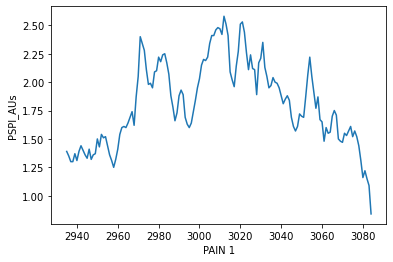

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

df=pd.read_csv('C:/Users/Nischal/Desktop/BioVid_data_processing/Listed_videos/Output/071709_w_23.csv')
# df=pd.read_csv('C:/Users/Nischal/Desktop/BioVid_data_processing/Listed_videos/Output/071911_w_24.csv')
# df=pd.read_csv('C:/Users/Nischal/Desktop/BioVid_data_processing/Listed_videos/Output/073114_m_25.csv')
# df=pd.read_csv('C:/Users/Nischal/Desktop/BioVid_data_processing/Listed_videos/Output/080309_m_29.csv')
# df=pd.read_csv('C:/Users/Nischal/Desktop/BioVid_data_processing/Listed_videos/Output/091814_m_37.csv')
# df=pd.read_csv('C:/Users/Nischal/Desktop/BioVid_data_processing/Listed_videos/Output/092813_w_24.csv')
# df=pd.read_csv('C:/Users/Nischal/Desktop/BioVid_data_processing/Listed_videos/Output/100117_w_36.csv')

Only_1 = df[df.H_LABEL == 1]
plt.plot(Only_1['PSPI_score'][0:150])
# plt.plot(Final_DF['SUM_AU_r'])
plt.ylabel('PSPI_AUs')
plt.xlabel('PAIN 1')
# plt.savefig('Pain_1_PSPI.png')

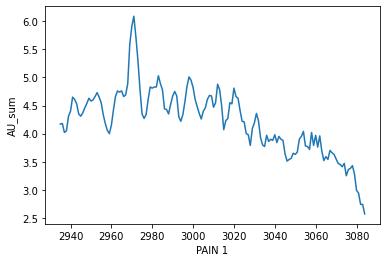

In [143]:
plt.plot(Only_1['SUM_AU_r'][0:150])
plt.ylabel('AU_sum')
plt.xlabel('PAIN 1')
plt.savefig('Pain_1_AU.png')

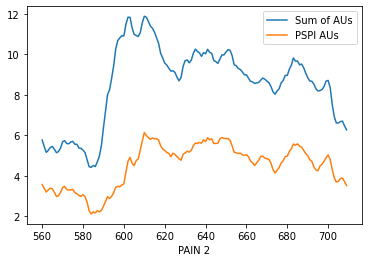

In [159]:
Only_2 = df[df.H_LABEL == 2]
plt.plot(Only_2['SUM_AU_r'][0:150],label ='Sum of AUs')
plt.plot(Only_2['PSPI_score'][0:150],label ='PSPI AUs')
# plt.plot(Final_DF['SUM_AU_r'])
# plt.ylabel('PSPI_AUs')
plt.xlabel('PAIN 2')
plt.legend()
# plt.show()
plt.savefig('Pain_2.png')

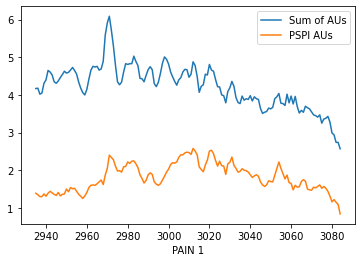

In [160]:
Only_1 = df[df.H_LABEL == 1]
plt.plot(Only_1['SUM_AU_r'][0:150],label ='Sum of AUs')
plt.plot(Only_1['PSPI_score'][0:150],label ='PSPI AUs')
# plt.plot(Final_DF['SUM_AU_r'])
# plt.ylabel('PSPI_AUs')
plt.xlabel('PAIN 1')
plt.legend()
# plt.show()
plt.savefig('Pain_1.png')

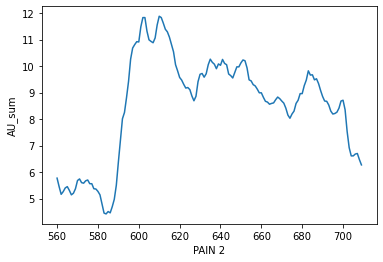

In [145]:
plt.plot(Only_2['SUM_AU_r'][0:150])
plt.ylabel('AU_sum')
plt.xlabel('PAIN 2')
plt.savefig('Pain_2_AU.png')

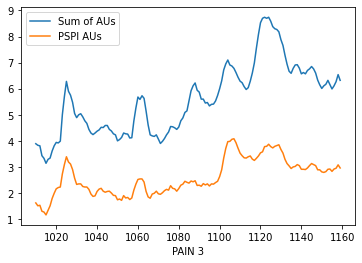

In [161]:
Only_3 = df[df.H_LABEL == 3]
plt.plot(Only_3['SUM_AU_r'][0:150],label ='Sum of AUs')
plt.plot(Only_3['PSPI_score'][0:150],label ='PSPI AUs')
# plt.plot(Final_DF['SUM_AU_r'])
# plt.ylabel('PSPI_AUs')
plt.xlabel('PAIN 3')
plt.legend()
# plt.show()
plt.savefig('Pain_3.png')

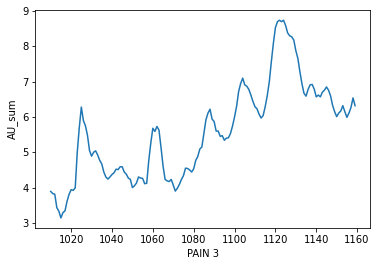

In [147]:
plt.plot(Only_3['SUM_AU_r'][0:150])
plt.ylabel('AU_sum')
plt.xlabel('PAIN 3')
plt.savefig('Pain_3_AU.png')

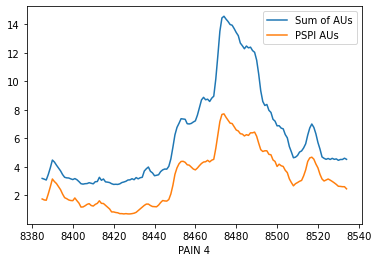

In [162]:
Only_4 = df[df.H_LABEL == 4]
plt.plot(Only_4['SUM_AU_r'][0:150],label ='Sum of AUs')
plt.plot(Only_4['PSPI_score'][0:150],label ='PSPI AUs')
# plt.plot(Final_DF['SUM_AU_r'])
# plt.ylabel('PSPI_AUs')
plt.xlabel('PAIN 4')
plt.legend()
# plt.show()
plt.savefig('Pain_4.png')

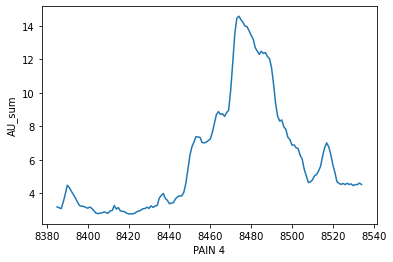

In [149]:
plt.plot(Only_4['SUM_AU_r'][0:150])
plt.ylabel('AU_sum')
plt.xlabel('PAIN 4')
plt.savefig('Pain_4_AU.png')

In [7]:
print('Pain 1 Sum of AU all',Only_1["SUM_AU_r"].mean())
print('Pain 2 Sum of AU all',Only_2["SUM_AU_r"].mean())
print('Pain 3 Sum of AU all',Only_3["SUM_AU_r"].mean())
print('Pain 4 Sum of AU all',Only_4["SUM_AU_r"].mean())

a=[Only_1["SUM_AU_r"].mean(),Only_2["SUM_AU_r"].mean(),Only_3["SUM_AU_r"].mean(),Only_4["SUM_AU_r"].mean()]

print('Pain 1 Sum of PSPI related',Only_1["PSPI_score"].mean())
print('Pain 2 Sum of PSPI related',Only_2["PSPI_score"].mean())
print('Pain 3 Sum of PSPI related',Only_3["PSPI_score"].mean())
print('Pain 4 Sum of PSPI related',Only_4["PSPI_score"].mean())

b=[Only_1["PSPI_score"].mean(),Only_2["PSPI_score"].mean(),Only_3["PSPI_score"].mean(),Only_4["PSPI_score"].mean()]


Pain 1 Sum of AU all 4.377956953642384 5.996936020051334


NameError: name 'Only_2' is not defined

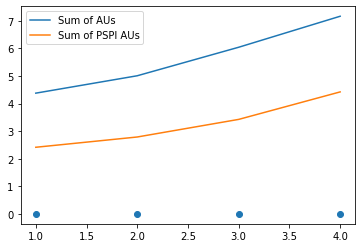

In [141]:
x=[1,2,3,4]
y=[0,0,0,0]
plt.scatter(x,y)
plt.plot(x,a,label ='Sum of AUs')
plt.plot(x,b,label ='Sum of PSPI AUs')
plt.legend()
# plt.savefig('100117_w_36.png')

In [23]:
import matplotlib.pyplot as plt


In [38]:

df1=pd.read_csv('C:/Users/Nischal/Desktop/BioVid_data_processing/Listed_videos(2secondoffset)/Output/071709_w_23.csv')
df2=pd.read_csv('C:/Users/Nischal/Desktop/BioVid_data_processing/Listed_videos(2secondoffset)/Output/071911_w_24.csv')
df3=pd.read_csv('C:/Users/Nischal/Desktop/BioVid_data_processing/Listed_videos(2secondoffset)/Output/073114_m_25.csv')
df4=pd.read_csv('C:/Users/Nischal/Desktop/BioVid_data_processing/Listed_videos(2secondoffset)/Output/080309_m_29.csv')
df5=pd.read_csv('C:/Users/Nischal/Desktop/BioVid_data_processing/Listed_videos(2secondoffset)/Output/080714_m_23.csv')
df6=pd.read_csv('C:/Users/Nischal/Desktop/BioVid_data_processing/Listed_videos(2secondoffset)/Output/081014_w_27.csv')

df7=pd.read_csv('C:/Users/Nischal/Desktop/BioVid_data_processing/Listed_videos(2secondoffset)/Output/091814_m_37.csv')
df8=pd.read_csv('C:/Users/Nischal/Desktop/BioVid_data_processing/Listed_videos(2secondoffset)/Output/092808_m_51.csv')
df9=pd.read_csv('C:/Users/Nischal/Desktop/BioVid_data_processing/Listed_videos(2secondoffset)/Output/100117_w_36.csv')
df10=pd.read_csv('C:/Users/Nischal/Desktop/BioVid_data_processing/Listed_videos(2secondoffset)/Output/100909_w_65.csv')
df11=pd.read_csv('C:/Users/Nischal/Desktop/BioVid_data_processing/Listed_videos(2secondoffset)/Output/101814_m_58.csv')
df12=pd.read_csv('C:/Users/Nischal/Desktop/BioVid_data_processing/Listed_videos(2secondoffset)/Output/111914_w_63.csv')

df13=pd.read_csv('C:/Users/Nischal/Desktop/BioVid_data_processing/Listed_videos(2secondoffset)/Output/112310_m_20.csv')
df14=pd.read_csv('C:/Users/Nischal/Desktop/BioVid_data_processing/Listed_videos(2secondoffset)/Output/112809_w_23.csv')
df15=pd.read_csv('C:/Users/Nischal/Desktop/BioVid_data_processing/Listed_videos(2secondoffset)/Output/120514_w_56.csv')
df16=pd.read_csv('C:/Users/Nischal/Desktop/BioVid_data_processing/Listed_videos(2secondoffset)/Output/092813_w_24.csv')


final_file=pd.concat([df1, df2, df3, df4, df5, df6, df7,df8,df9,df10,df11,df12,df13,df14,df15,df16], ignore_index=True)


In [39]:
final_file.to_csv ('C:/Users/Nischal/Desktop/BioVid_data_processing/Listed_videos(2secondoffset)/Output/combined.csv', index = False, header=True)

In [40]:
Only_0c = final_file[final_file.H_LABEL == 0]
Only_1c = final_file[final_file.H_LABEL == 1]
Only_2c = final_file[final_file.H_LABEL == 2]
Only_3c = final_file[final_file.H_LABEL == 3]
Only_4c = final_file[final_file.H_LABEL == 4]
a=[Only_0c["SUM_AU_r"].mean(),Only_1c["SUM_AU_r"].mean(),Only_2c["SUM_AU_r"].mean(),Only_3c["SUM_AU_r"].mean(),Only_4c["SUM_AU_r"].mean()]
b=[Only_0c["PSPI_score"].mean(),Only_1c["PSPI_score"].mean(),Only_2c["PSPI_score"].mean(),Only_3c["PSPI_score"].mean(),Only_4c["PSPI_score"].mean()]
print("Mean")
print(a)
print(b)

Mean
[6.399437084558907, 6.73721318279927, 6.979684127511208, 8.044272809767364, 11.017356459330143]
[2.4882546263056713, 2.5518064087663954, 2.6445077204051137, 3.267625804322719, 4.464735604685695]


In [41]:
a=[Only_0c["SUM_AU_r"].var(),Only_1c["SUM_AU_r"].var(),Only_2c["SUM_AU_r"].var(),Only_3c["SUM_AU_r"].var(),Only_4c["SUM_AU_r"].var()]
b=[Only_0c["PSPI_score"].var(),Only_1c["PSPI_score"].var(),Only_2c["PSPI_score"].var(),Only_3c["PSPI_score"].var(),Only_4c["PSPI_score"].var()]
print("Variance")
print(a)
print(b)

Variance
[13.623993002858555, 20.490235834672415, 22.29954350156533, 27.44221912633074, 31.20551983151749]
[3.9700654007323757, 5.264948752027333, 5.738804344425883, 6.203934131142878, 6.84346330921198]


In [42]:
a=[Only_0c["SUM_AU_r"].std(),Only_1c["SUM_AU_r"].std(),Only_2c["SUM_AU_r"].std(),Only_3c["SUM_AU_r"].std(),Only_4c["SUM_AU_r"].std()]
b=[Only_0c["PSPI_score"].std(),Only_1c["PSPI_score"].std(),Only_2c["PSPI_score"].std(),Only_3c["PSPI_score"].std(),Only_4c["PSPI_score"].std()]
print("Std")
print(a)
print(b)

Std
[3.6910693576331717, 4.526614168964747, 4.7222392465402825, 5.238532153793726, 5.586190099837052]
[1.992502296292874, 2.294547613806986, 2.3955801686493157, 2.4907697868616596, 2.6160013970202654]


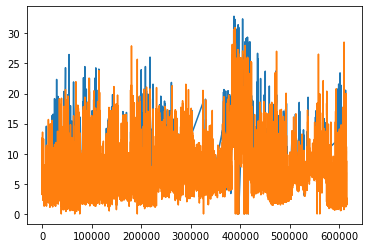

In [24]:
# Only_0c["SUM_AU_r"]
plt.plot(Only_4c["SUM_AU_r"])
plt.plot(Only_0c["SUM_AU_r"])


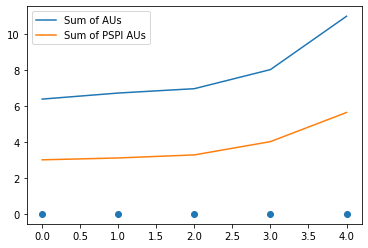

In [26]:
x=[0,1,2,3,4]
y=[0,0,0,0,0]
plt.scatter(x,y)
plt.plot(x,a,label ='Sum of AUs')
plt.plot(x,b,label ='Sum of PSPI AUs')
plt.legend()
# plt.savefig('Combined.png')

In [27]:
a

[6.399437084558907,
 6.73721318279927,
 6.979684127511208,
 8.044272809767364,
 11.017356459330143]

In [28]:
b

[3.014624510734881,
 3.118452598372904,
 3.2889490287232275,
 4.02947657152285,
 5.653433839300445]

Text(0.5, 0, 'PAIN 1')

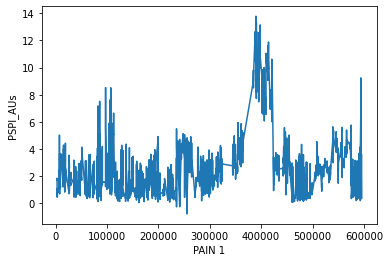

In [43]:
# a=[Only_0c["SUM_AU_r"],Only_1c["SUM_AU_r"],Only_2c["SUM_AU_r"].mean(),Only_3c["SUM_AU_r"].mean(),Only_4c["SUM_AU_r"].mean()]
# b=[Only_0c["PSPI_score"].mean(),Only_1c["PSPI_score"].mean(),Only_2c["PSPI_score"].mean(),Only_3c["PSPI_score"].mean(),Only_4c["PSPI_score"].mean()]

df=pd.read_csv('C:/Users/Nischal/Desktop/BioVid_data_processing/Listed_videos(2secondoffset)/Output/combined.csv')
# df=pd.read_csv('C:/Users/Nischal/Desktop/BioVid_data_processing/Listed_videos/Output/071911_w_24.csv')
# df=pd.read_csv('C:/Users/Nischal/Desktop/BioVid_data_processing/Listed_videos/Output/073114_m_25.csv')
# df=pd.read_csv('C:/Users/Nischal/Desktop/BioVid_data_processing/Listed_videos/Output/080309_m_29.csv')
# df=pd.read_csv('C:/Users/Nischal/Desktop/BioVid_data_processing/Listed_videos/Output/091814_m_37.csv')
# df=pd.read_csv('C:/Users/Nischal/Desktop/BioVid_data_processing/Listed_videos/Output/092813_w_24.csv')
# df=pd.read_csv('C:/Users/Nischal/Desktop/BioVid_data_processing/Listed_videos/Output/100117_w_36.csv')

Only_0 = df[df.H_LABEL == 1]
plt.plot(Only_0['PSPI_score'])
# plt.plot(Final_DF['SUM_AU_r'])
plt.ylabel('PSPI_AUs')
plt.xlabel('PAIN 1')
# plt.savefig('Pain_1_PSPI.png')

Text(0.5, 0, 'PAIN 4')

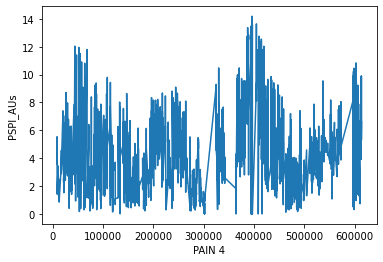

In [44]:
Only_0 = df[df.H_LABEL == 4]
plt.plot(Only_0['PSPI_score'])
# plt.plot(Final_DF['SUM_AU_r'])
plt.ylabel('PSPI_AUs')
plt.xlabel('PAIN 4')
# plt.savefig('Pain_1_PSPI.png')

In [45]:
column = df["PSPI_score"]
max_value = column.max()
print(max_value)

14.36


In [46]:
column = df["SUM_AU_r"]
max_value = column.max()
print(max_value)

34.2
